In [19]:
import pandas as pd
import librosa
import IPython.display as ipd
import numpy as np
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
import sklearn
import keras
import csv
import pathlib
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import  LabelEncoder, StandardScaler, normalize 
from sklearn.decomposition import PCA
%matplotlib inline

In [20]:
dataset = pd.read_csv("spectogramextractedmusicfeatureset.csv")

In [21]:
dataset.shape

(1000, 31)

In [22]:
dataset.head()

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,...,6.815101,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714,blues
1,blues.00001.wav,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,...,2.652497,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939,blues
2,blues.00002.wav,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,...,4.676634,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193,blues
3,blues.00003.wav,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,...,5.115472,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497,blues
4,blues.00004.wav,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,...,-6.884608,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401,blues


In [23]:
# Y = dataset['label']
X = dataset
#X['numlabels'] = X['label'].astype('category').cat.codes
X = dataset.drop(['Filename', 'label'],axis=1) #Filename is not required
Y = dataset['label']
# X = np.array(X)
# Y = np.array(Y)
X

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,-188.219376,...,-3.807535,6.815101,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714
1,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,-286.179047,...,-0.355949,2.652497,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939
2,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,-165.737717,...,-10.915662,4.676634,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193
3,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,-274.498962,...,2.306320,5.115472,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497
4,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,-236.696884,...,-12.310408,-6.884608,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.312355,0.066177,26.828857,1585.924113,0.001471,1878.318531,-0.020311,3388.996174,0.066483,-213.199493,...,-9.252023,10.070771,-10.888953,2.198623,-8.872386,-0.953045,-12.683362,0.744433,-4.840060,-3.064359
996,0.346405,0.060725,26.802236,1685.060612,0.001741,1869.974954,-0.012931,3395.737800,0.080015,-197.364792,...,-10.789764,12.185410,-15.749372,2.540702,-1.597802,0.542841,-10.845517,-0.644788,-7.396799,-5.802427
997,0.366321,0.060540,26.163345,1807.488277,0.002249,1787.003967,0.003787,3561.578464,0.103777,-181.841599,...,-14.268676,6.846561,-16.928728,-3.545232,-11.599463,-2.044957,-12.994104,0.291607,-13.022841,-6.441196
998,0.327976,0.071790,25.974198,1047.122495,0.000313,1548.829422,0.020775,2153.220313,0.036349,-285.583069,...,-5.814487,5.102398,-8.889581,-3.410276,-4.522196,-5.790967,-3.085016,0.166745,-4.406106,-5.594728


In [24]:
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
# Separating out the features
x = X.loc[:, features].values
# Separating out the target
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.10)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def find_best_neighbour(X_train, Y_train, X_test, Y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(Y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [28]:
find_best_neighbour(X_train, Y_train, X_test, Y_test, min_k=1, max_k=25)

Best Value for k: 3
F1-Score: 0.64


In [29]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)

In [30]:
def output_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='micro')))
    
output_metrics(Y_test, preds)

Precision Score: 0.62
Recall Score: 0.62
Accuracy Score: 0.62
F1 Score: 0.62


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, preds))

[[7 0 3 0 0 0 0 0 1 0]
 [0 9 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 1 1 0]
 [1 0 0 5 1 0 0 2 1 2]
 [0 0 0 2 5 0 0 1 0 1]
 [0 2 3 0 0 9 1 0 1 0]
 [1 0 0 0 0 0 8 0 0 2]
 [0 0 1 0 1 0 0 5 0 1]
 [0 0 1 0 0 1 0 0 4 1]
 [1 0 2 0 0 0 0 0 2 2]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

       blues       0.70      0.64      0.67        11
   classical       0.82      1.00      0.90         9
     country       0.44      0.80      0.57        10
       disco       0.71      0.42      0.53        12
      hiphop       0.71      0.56      0.63         9
        jazz       0.90      0.56      0.69        16
       metal       0.89      0.73      0.80        11
         pop       0.56      0.62      0.59         8
      reggae       0.40      0.57      0.47         7
        rock       0.22      0.29      0.25         7

    accuracy                           0.62       100
   macro avg       0.64      0.62      0.61       100
weighted avg       0.67      0.62      0.63       100



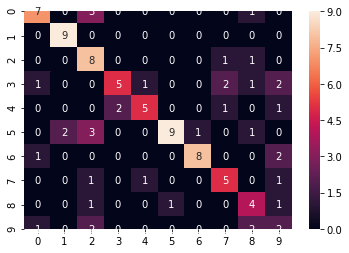

In [33]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, preds), annot=True)